# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results
- BONUS: Perform all the plots in 3D instead of 2D

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 1. Create a 4 dimensional data set with 64 elements and show 2D plots of the data $x_1 \rightarrow y, x_2 \rightarrow y$, etc.

In [2]:
#create the dataset
n = 64 #64 data elements
x = np.linspace(0, 1, n) + np.random.rand(4, n) #4-dimension
x = np.vstack([x, np.ones(len(x.T))]).T #np.ones is adding in ones to the end, similar to attaching another column
y = np.linspace(0, 1, n) + np.random.rand(n) - 1 #generate values for y, centered around 0

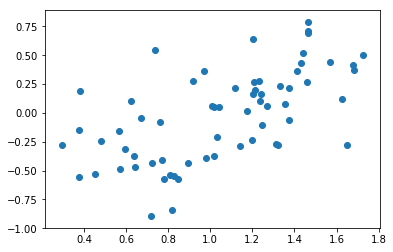

In [3]:
plt.scatter(x.T[0],y) #plot one of the dimensions

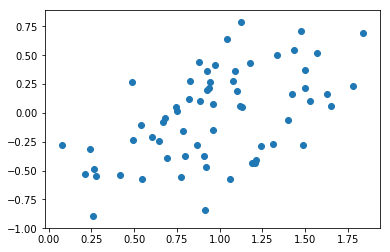

In [4]:
plt.scatter(x.T[1],y) #plot another dimension

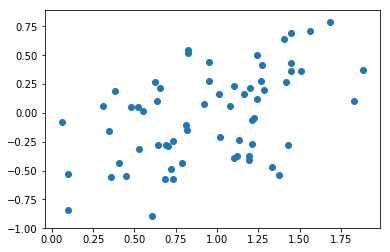

In [5]:
plt.scatter(x.T[2],y) #plot another dimension

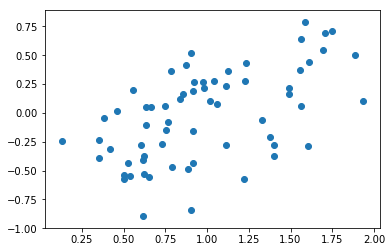

In [6]:
plt.scatter(x.T[3],y) #plot another dimension

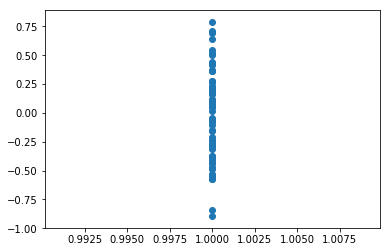

In [7]:
plt.scatter(x.T[4],y) #plot another dimension

Note: In this scatterplot all the values are at 1, which is because we added a column of 1's

## 2.  Create a model to fit the data. Hint: follow the example from Lesson 3

In [8]:
beta = np.linalg.lstsq(x, y)[0]
beta

array([ 0.33963698,  0.16718252,  0.12499569,  0.20918604, -0.86734641])

In [9]:
#check the answer using inverse
left = np.linalg.inv(np.dot(x.T, x))
right = np.dot(y.T, x)
np.dot(left, right)

array([ 0.33963698,  0.16718252,  0.12499569,  0.20918604, -0.86734641])

Note: The outputs match

## 3. Plot the model's prediction in 2D for 2 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p$) along with the original points

In [10]:
pred = np.dot(x, beta)

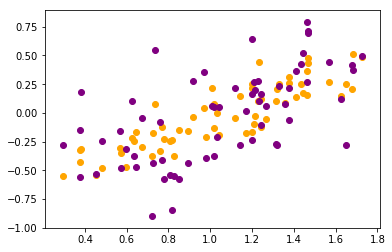

In [11]:
plt.scatter(x.T[0], pred, c='orange')
plt.scatter(x.T[0], y, c='purple')

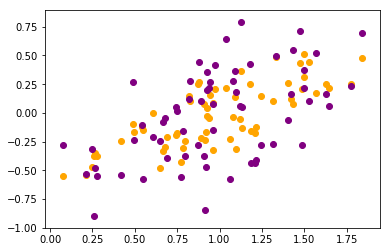

In [12]:
#plot another dimension
plt.scatter(x.T[1], pred, c='orange')
plt.scatter(x.T[1], y, c='purple')

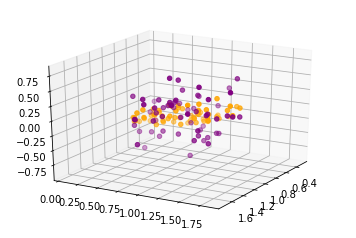

In [13]:
#plot in 3D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(23, 30)
ax.scatter(x.T[0], x.T[1], pred, zdir='z', c='orange')
ax.scatter(x.T[0], x.T[1], y, zdir='z', c='purple')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and create a model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [75]:
import pandas as pd
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [76]:
x = credit[['Balance', 'Limit']].as_matrix()

x = np.vstack([X.T, np.ones(len(X))]).T
x

array([[  1.48910000e+01,   3.60600000e+03,   1.00000000e+00,
          1.00000000e+00],
       [  1.06025000e+02,   6.64500000e+03,   1.00000000e+00,
          1.00000000e+00],
       [  1.04593000e+02,   7.07500000e+03,   1.00000000e+00,
          1.00000000e+00],
       ..., 
       [  5.78720000e+01,   4.17100000e+03,   1.00000000e+00,
          1.00000000e+00],
       [  3.77280000e+01,   2.52500000e+03,   1.00000000e+00,
          1.00000000e+00],
       [  1.87010000e+01,   5.52400000e+03,   1.00000000e+00,
          1.00000000e+00]])

In [77]:
y = credit['Rating']

In [78]:
beta = np.linalg.lstsq(x, y)[0]
beta

array([  0.02074642,   0.06657234,  19.37095344,  19.37095344])

In [79]:
creditprediction = np.dot(x, beta)

### 5. Plot your results (Bonus if you use 3D plots). Show as many of your columns vs. credit rating that you can. 

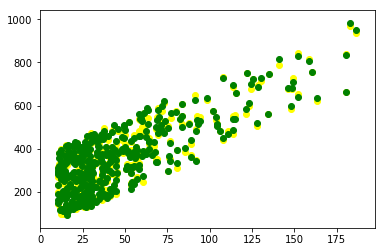

In [80]:
plt.scatter(x.T[0], creditprediction, c='yellow')
plt.scatter(x.T[0], y, c='green')

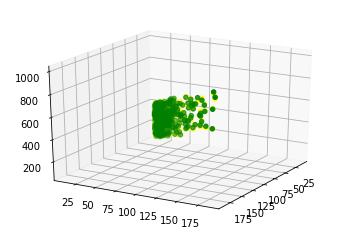

In [81]:
#plot in 3D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(23, 30)
ax.scatter(x.T[0], x.T[0], creditprediction, zdir='z', c='yellow')
ax.scatter(x.T[0], x.T[0], y, zdir='z', c='green')

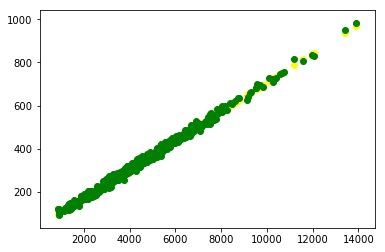

In [82]:
plt.scatter(x.T[1], creditprediction, c='yellow')
plt.scatter(x.T[1], y, c='green')

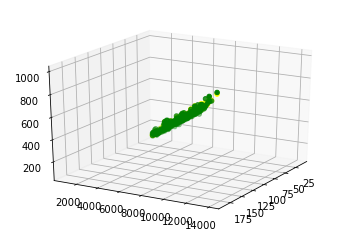

In [83]:
#plot in 3D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(23, 30)
ax.scatter(x.T[0], x.T[1], creditprediction, zdir='z', c='yellow')
ax.scatter(x.T[0], x.T[1], y, zdir='z', c='green')